In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import numpy.random as rnd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [3]:
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin

In [4]:
rnd.seed(42)

In [5]:
df=pd.read_csv("C:/Users/CHITRAK/Desktop/GitHub/Housing/train.csv")
print(df)

       Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeat

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [8]:
df.drop('LotFrontage', inplace=True, axis=1)

In [9]:
df.drop('Alley', inplace=True, axis=1)

In [10]:
df.drop('MasVnrArea', inplace=True, axis=1)

In [11]:
df.drop('BsmtQual', inplace=True, axis=1)

In [12]:
df.drop('BsmtCond', inplace=True, axis=1)

In [13]:
df.drop('BsmtExposure', inplace=True, axis=1)

In [14]:
df.drop('BsmtFinType1', inplace=True, axis=1)

In [15]:
df.drop('BsmtFinType2', inplace=True, axis=1)

In [16]:
df.drop('FireplaceQu', inplace=True, axis=1)

In [17]:
df.drop('GarageType', inplace=True, axis=1)

In [18]:
df.drop('GarageYrBlt', inplace=True, axis=1)

In [19]:
df.drop('GarageFinish', inplace=True, axis=1)

In [20]:
df.drop('GarageQual', inplace=True, axis=1)

In [21]:
df.drop('GarageCond', inplace=True, axis=1)

In [22]:
df.drop('PoolQC', inplace=True, axis=1)

In [23]:
df.drop('Fence', inplace=True, axis=1)

In [24]:
df.drop('MiscFeature', inplace=True, axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1168 non-null   int64 
 1   MSSubClass     1168 non-null   int64 
 2   MSZoning       1168 non-null   object
 3   LotArea        1168 non-null   int64 
 4   Street         1168 non-null   object
 5   LotShape       1168 non-null   object
 6   LandContour    1168 non-null   object
 7   Utilities      1168 non-null   object
 8   LotConfig      1168 non-null   object
 9   LandSlope      1168 non-null   object
 10  Neighborhood   1168 non-null   object
 11  Condition1     1168 non-null   object
 12  Condition2     1168 non-null   object
 13  BldgType       1168 non-null   object
 14  HouseStyle     1168 non-null   object
 15  OverallQual    1168 non-null   int64 
 16  OverallCond    1168 non-null   int64 
 17  YearBuilt      1168 non-null   int64 
 18  YearRemodAdd   1168 non-null

In [26]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2007,WD,Normal,128000
1,889,20,RL,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,...,0,0,224,0,0,10,2007,WD,Normal,268000
2,793,60,RL,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,6,2007,WD,Normal,269790
3,110,20,RL,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2010,COD,Normal,190000
4,422,20,RL,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,6,2009,WD,Normal,215000


In [27]:
df.shape

(1168, 64)

In [28]:
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,10484.749144,6.104452,5.595890,1970.930651,1984.758562,444.726027,46.647260,569.721747,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,8957.442311,1.390153,1.124343,30.145255,20.785185,462.664785,163.520016,449.375525,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,216.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,385.500000,0.000000,474.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,714.500000,0.000000,816.000000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>],
       [<AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>,
        <AxesSubplot:title={'center':'FullBath'}>],
       [<AxesSubplot:title={'center':'HalfBath'}>,
 

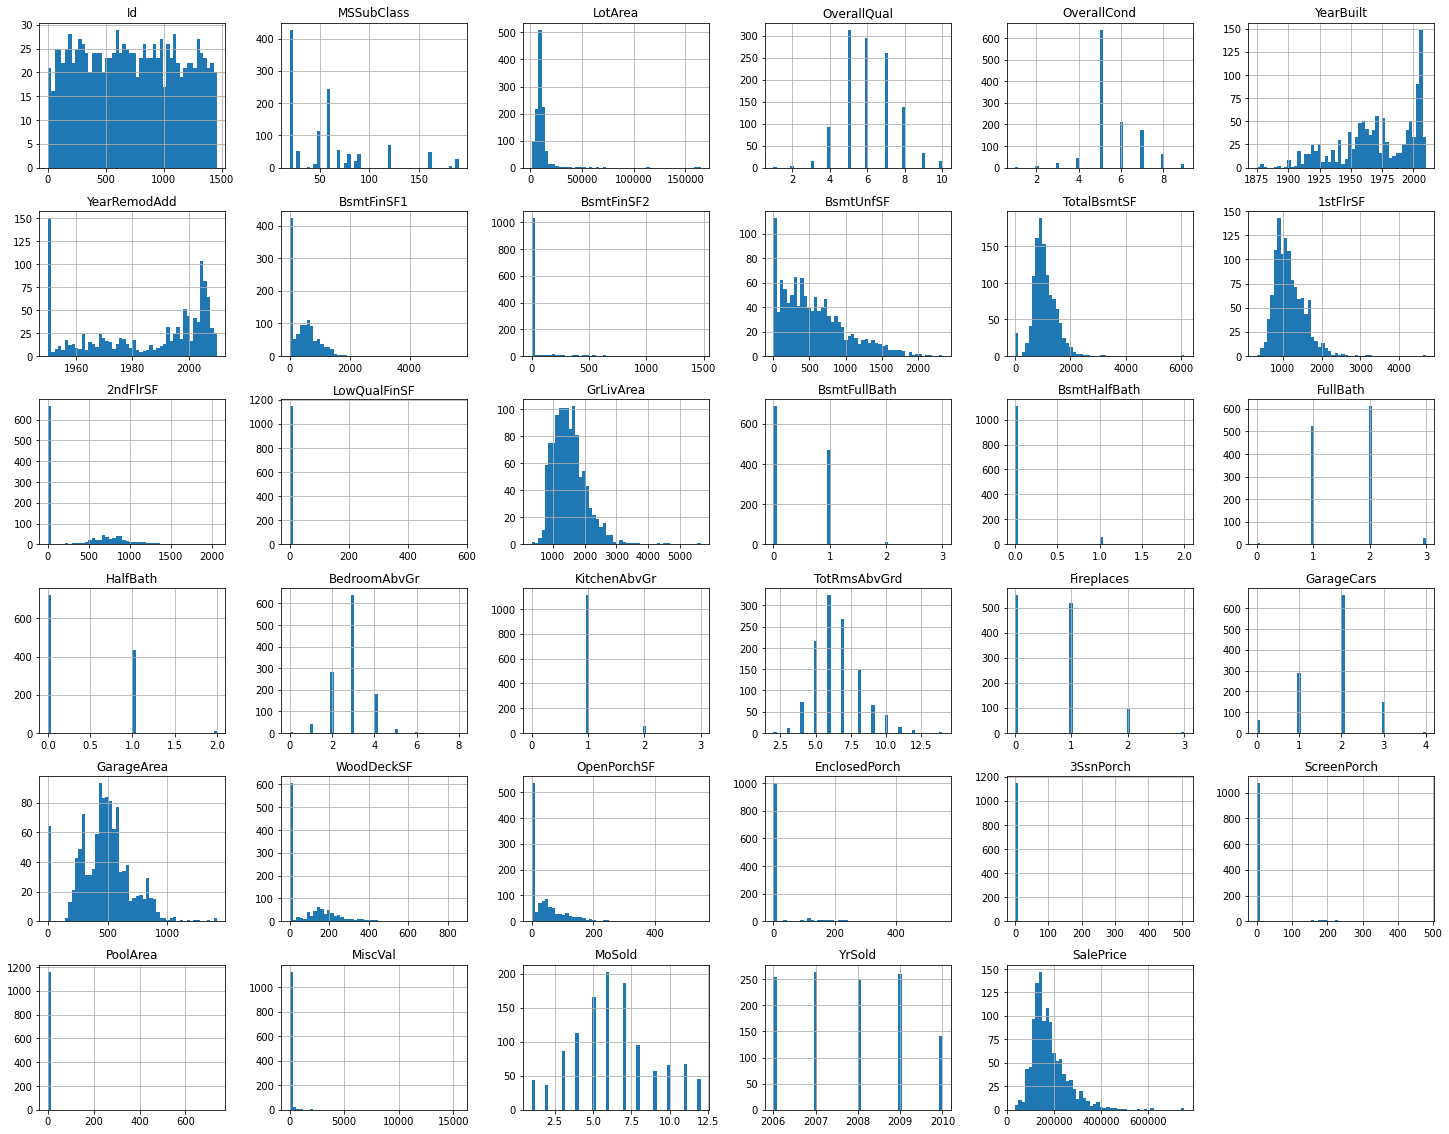

In [29]:
df.hist(bins=50,figsize=(25,20))

In [30]:
df['MSSubClass'].value_counts()

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64

array([[<AxesSubplot:title={'center':'LowQualFinSF'}>]], dtype=object)

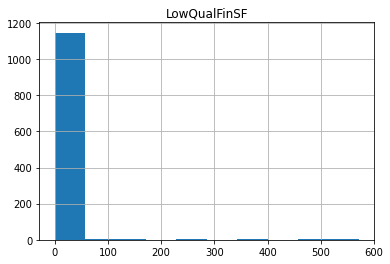

In [31]:
df.hist('LowQualFinSF')

In [32]:
df.drop('LowQualFinSF', inplace=True, axis=1)

array([[<AxesSubplot:title={'center':'KitchenAbvGr'}>]], dtype=object)

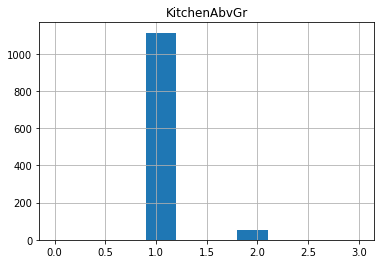

In [33]:
df.hist('KitchenAbvGr')

In [34]:
df.drop('KitchenAbvGr', inplace=True, axis=1)

array([[<AxesSubplot:title={'center':'HalfBath'}>]], dtype=object)

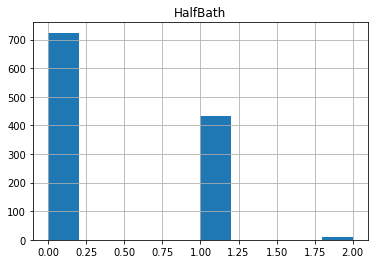

In [35]:
df.hist('HalfBath')

In [36]:
df['HalfBath'].value_counts()

0    724
1    434
2     10
Name: HalfBath, dtype: int64

array([[<AxesSubplot:title={'center':'BsmtFinSF2'}>]], dtype=object)

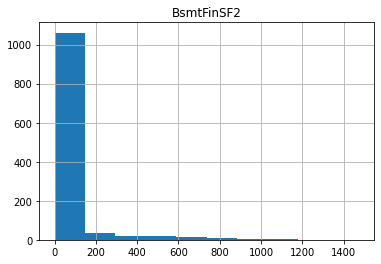

In [37]:
df.hist('BsmtFinSF2')

In [38]:
df.drop('BsmtFinSF2', inplace=True, axis=1)

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>],
       [<AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>,
        <AxesSubplot:title={'center':'BedroomAbvGr'}>],
       [<AxesSubplot:title={'center':'TotRmsAbvGrd'}>,

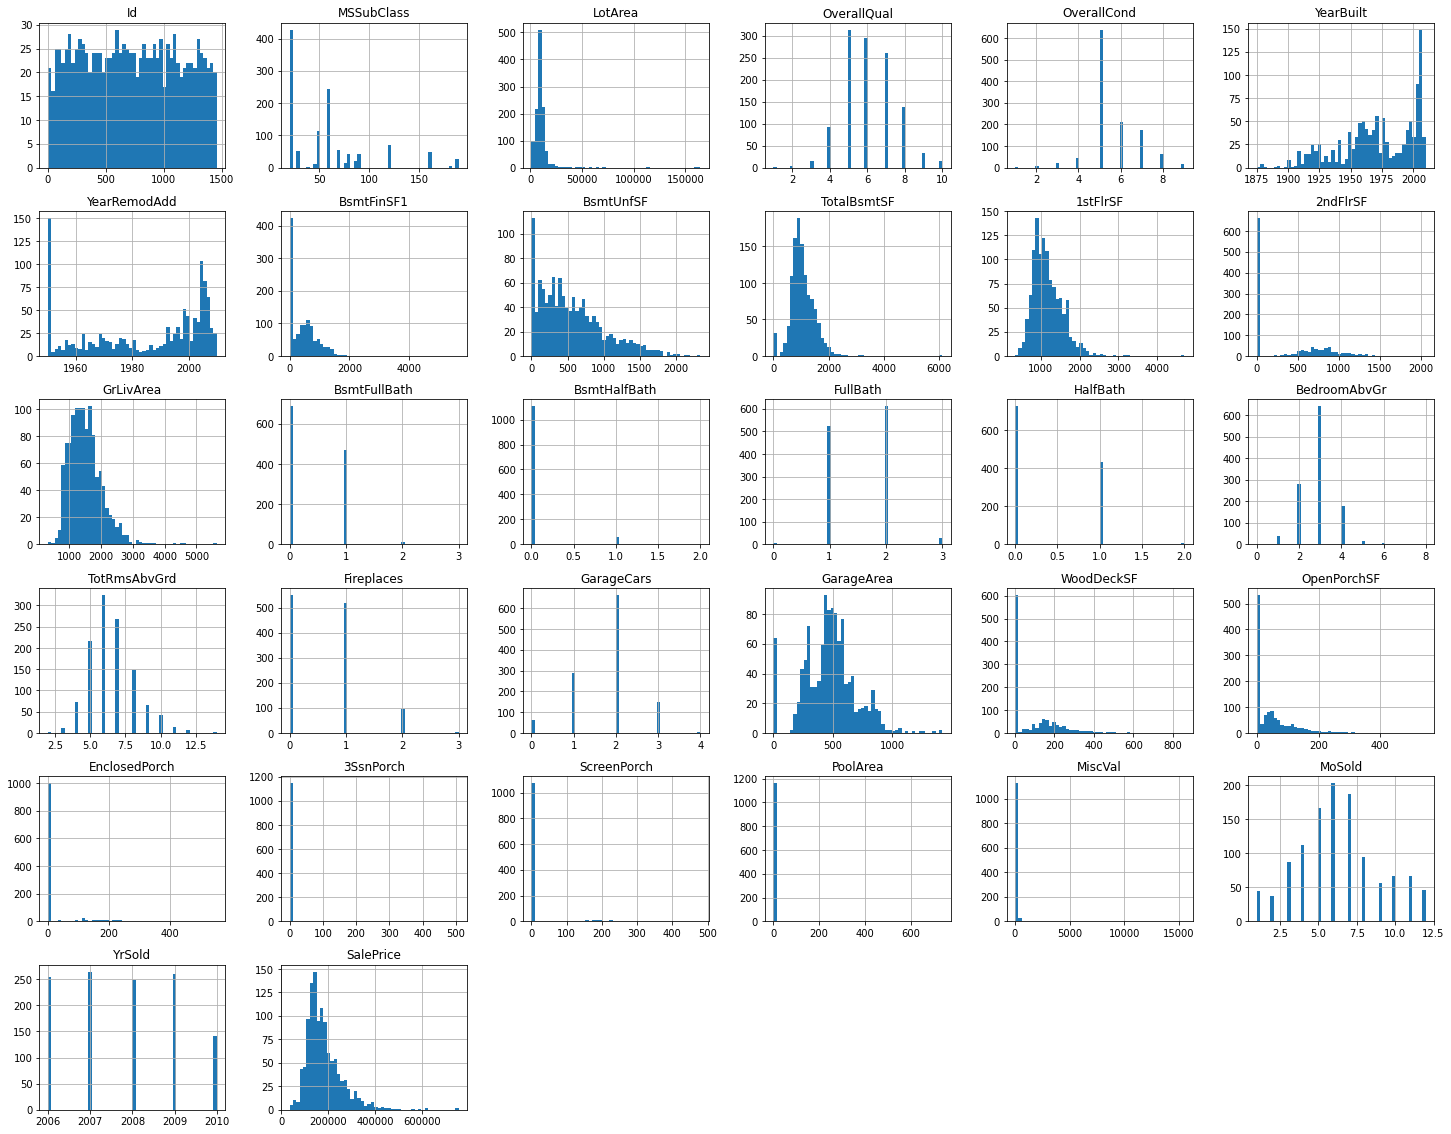

In [39]:
df.hist(bins=50,figsize=(25,20))

array([[<AxesSubplot:title={'center':'BsmtHalfBath'}>]], dtype=object)

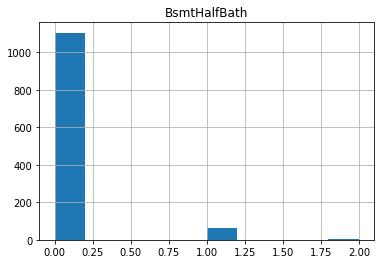

In [40]:
df.hist('BsmtHalfBath')

In [41]:
df.drop('BsmtHalfBath', inplace=True, axis=1)

array([[<AxesSubplot:title={'center':'EnclosedPorch'}>]], dtype=object)

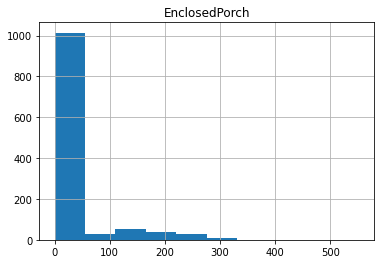

In [42]:
df.hist('EnclosedPorch')

In [43]:
df.drop('EnclosedPorch', inplace=True, axis=1)

In [44]:
df.drop('3SsnPorch', inplace=True, axis=1)

In [45]:
df.drop('ScreenPorch', inplace=True, axis=1)

In [46]:
df.drop('PoolArea', inplace=True, axis=1)

In [47]:
df.drop('MiscVal', inplace=True, axis=1)

array([[<AxesSubplot:title={'center':'2ndFlrSF'}>]], dtype=object)

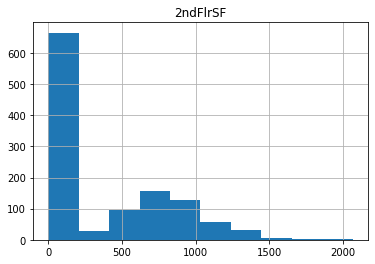

In [48]:
df.hist('2ndFlrSF')

In [49]:
df.drop('2ndFlrSF', inplace=True, axis=1)

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>],
       [<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>],
       [<AxesSubplot:title={'center':'BedroomAbvGr'}>,
        <AxesSubplot:title={'center':'TotRmsAbvGrd'}>,
        <AxesSubplot:title={'center':'Fireplaces'}>,
        <AxesSubplot:title={'center':'GarageCars'}>,

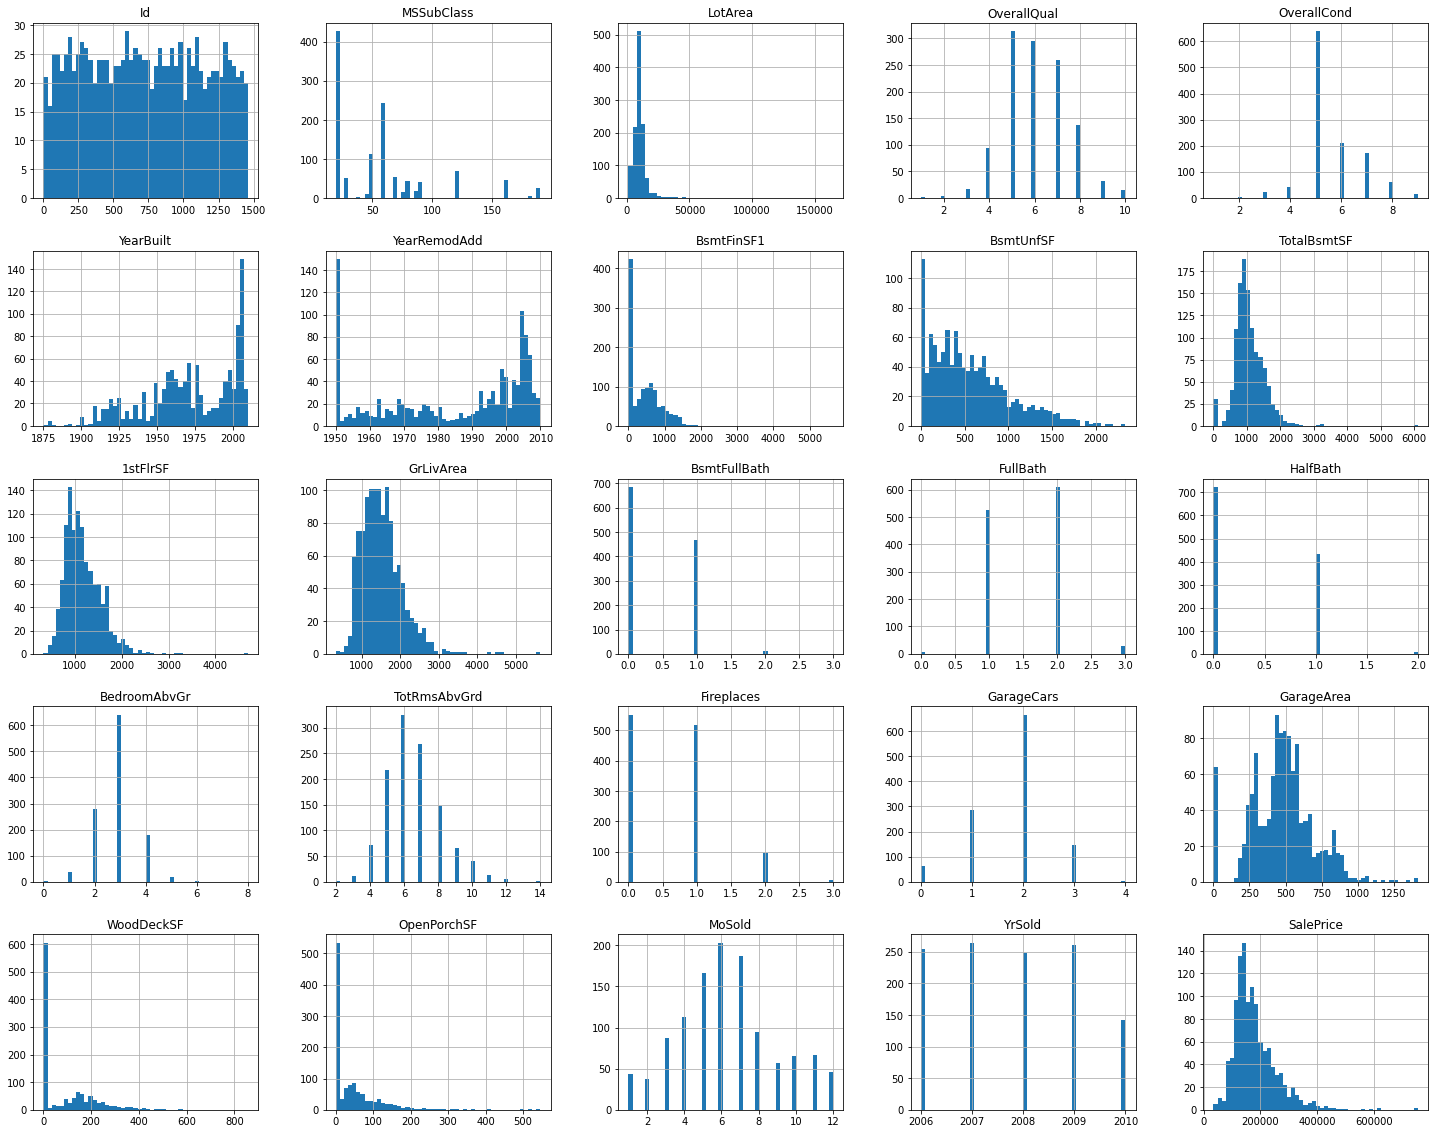

In [50]:
df.hist(bins=50,figsize=(25,20))

In [51]:
df.drop('Fireplaces', inplace=True, axis=1)

In [52]:
df['WoodDeckSF'].value_counts()

0      603
144     29
192     28
100     26
120     25
      ... 
185      1
342      1
183      1
344      1
857      1
Name: WoodDeckSF, Length: 244, dtype: int64

In [53]:
df.drop('WoodDeckSF', inplace=True, axis=1)

In [54]:
df['OpenPorchSF'].value_counts()

0      531
36      24
48      18
20      17
24      14
      ... 
176      1
180      1
182      1
187      1
111      1
Name: OpenPorchSF, Length: 176, dtype: int64

In [55]:
df.drop('OpenPorchSF', inplace=True, axis=1)

In [56]:
df['LotArea'].value_counts()

9600     21
7200     18
6000     16
8400     14
9000     11
         ..
9439      1
7390      1
8160      1
7388      1
13284     1
Name: LotArea, Length: 892, dtype: int64

array([[<AxesSubplot:title={'center':'LotArea'}>]], dtype=object)

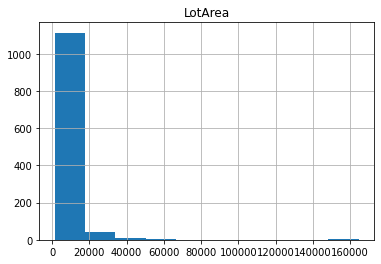

In [57]:
df.hist('LotArea')

In [58]:
df.drop('LotArea', inplace=True, axis=1)

In [59]:
df['HalfBath'].value_counts()

0    724
1    434
2     10
Name: HalfBath, dtype: int64

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>],
       [<AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>,
        <AxesSubplot:title={'center':'BedroomAbvGr'}>],
       [<AxesSubplot:title={'center':'TotRmsAbvGrd'}>,
        <AxesSubplot:title={'center':'GarageCars'}>,
        <AxesSubplot:title={'center':'GarageArea'}>,
        <AxesSubplot:title={'center':'MoSold'}>,


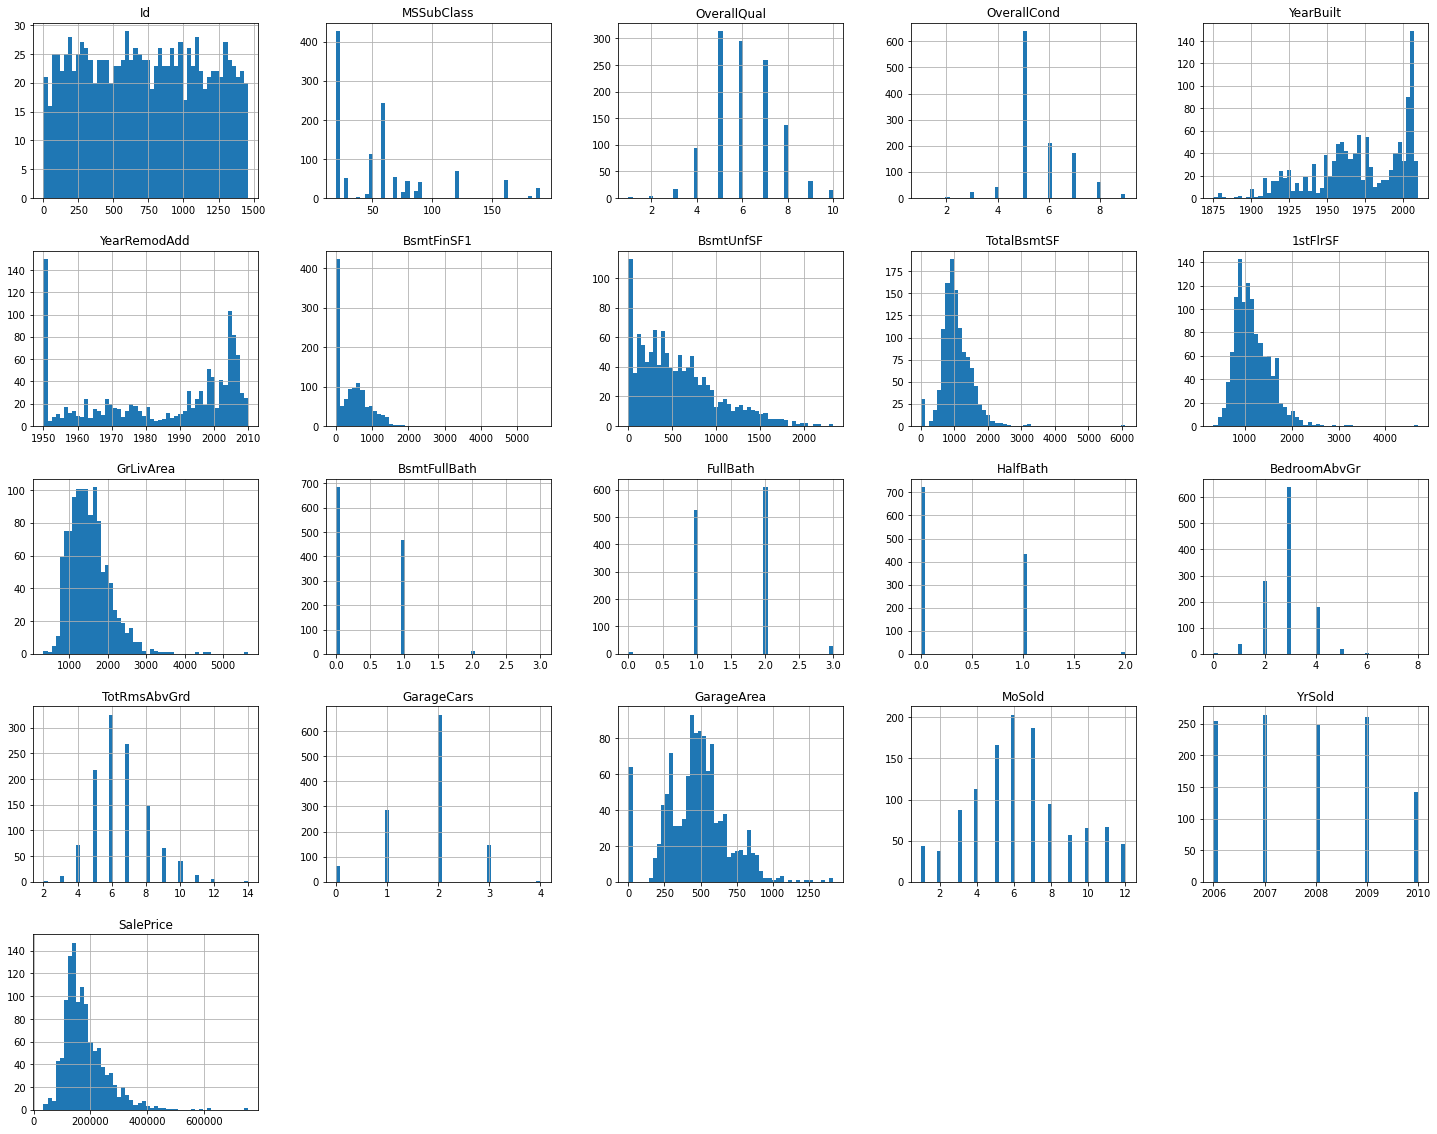

In [60]:
df.hist(bins=50,figsize=(25,20))

In [61]:
df['MoSold'].value_counts()

6     203
7     187
5     166
4     113
8      95
3      87
11     67
10     66
9      57
12     46
1      44
2      37
Name: MoSold, dtype: int64

array([[<AxesSubplot:title={'center':'MoSold'}>]], dtype=object)

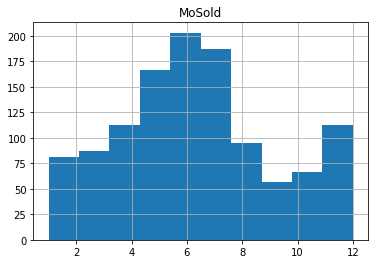

In [62]:
df.hist('MoSold')

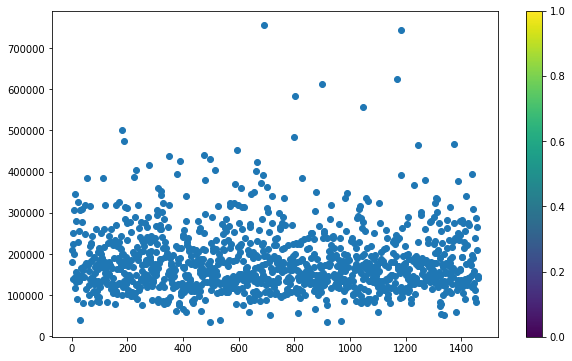

In [63]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['Id'],y=df['SalePrice'])
plt.colorbar()

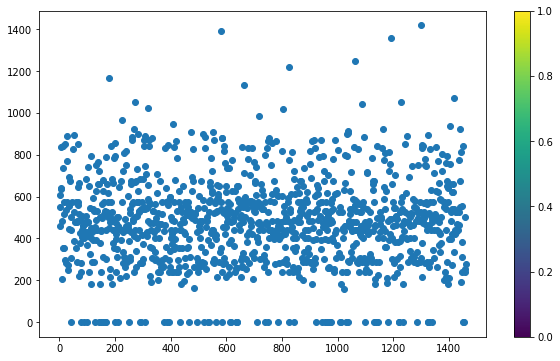

In [64]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['Id'],y=df['GarageArea'])
plt.colorbar()

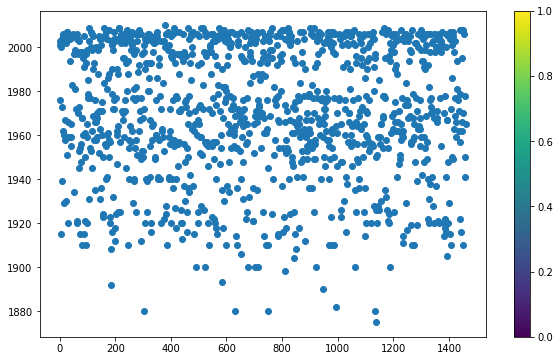

In [65]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['Id'],y=df['YearBuilt'])
plt.colorbar()

In [66]:
df.describe()

,Id,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,6.104452,5.595890,1970.930651,1984.758562,444.726027,569.721747,1061.095034,1169.860445,...,0.425514,1.562500,0.388699,2.884418,6.542808,1.776541,476.860445,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,1.390153,1.124343,30.145255,20.785185,462.664785,449.375525,442.272249,391.161983,...,0.521615,0.551882,0.504929,0.817229,1.598484,0.745554,214.466769,2.686352,1.329738,79105.586863
min,1.000000,20.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,216.000000,799.000000,892.000000,...,0.000000,1.000000,0.000000,2.000000,5.000000,1.000000,338.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,6.000000,5.000000,1972.000000,1993.000000,385.500000,474.000000,1005.500000,1096.500000,...,0.000000,2.000000,0.000000,3.000000,6.000000,2.000000,480.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,7.000000,6.000000,2000.000000,2004.000000,714.500000,816.000000,1291.500000,1392.000000,...,1.000000,2.000000,1.000000,3.000000,7.000000,2.000000,576.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,2336.000000,6110.000000,4692.000000,...,3.000000,3.000000,2.000000,8.000000,14.000000,4.000000,1418.000000,12.000000,2010.000000,755000.000000


In [67]:
corr_matrix=df.corr()

In [68]:
corr_matrix['Id'].sort_values(ascending=False)

Id              1.000000
OverallCond     0.039761
MoSold          0.023479
BsmtFullBath    0.023027
GarageArea      0.010048
1stFlrSF        0.009647
BedroomAbvGr    0.009376
GarageCars      0.007549
MSSubClass      0.004259
BsmtFinSF1      0.003868
TotRmsAbvGrd   -0.001613
YrSold         -0.008853
TotalBsmtSF    -0.013812
FullBath       -0.015187
YearBuilt      -0.016942
YearRemodAdd   -0.018590
BsmtUnfSF      -0.019494
SalePrice      -0.023897
GrLivArea      -0.024325
HalfBath       -0.028512
OverallQual    -0.036965
Name: Id, dtype: float64

In [69]:
corr_matrix['MSSubClass'].sort_values(ascending=False)

MSSubClass      1.000000
HalfBath        0.168423
FullBath        0.140807
GrLivArea       0.086448
OverallQual     0.070462
YearRemodAdd    0.056618
TotRmsAbvGrd    0.051179
YearBuilt       0.023988
BsmtFullBath    0.004556
Id              0.004259
BedroomAbvGr   -0.013283
MoSold         -0.016015
GarageCars     -0.027639
YrSold         -0.038595
BsmtFinSF1     -0.052236
OverallCond    -0.056978
SalePrice      -0.060775
GarageArea     -0.092408
BsmtUnfSF      -0.134170
TotalBsmtSF    -0.214042
1stFlrSF       -0.227927
Name: MSSubClass, dtype: float64

In [70]:
corr_matrix['BedroomAbvGr'].sort_values(ascending=False)    

BedroomAbvGr    1.000000
TotRmsAbvGrd    0.672542
GrLivArea       0.509273
FullBath        0.357069
HalfBath        0.198263
SalePrice       0.158281
BsmtUnfSF       0.156056
1stFlrSF        0.106293
OverallQual     0.099639
MoSold          0.064584
GarageCars      0.058834
TotalBsmtSF     0.036237
GarageArea      0.028543
OverallCond     0.028393
Id              0.009376
MSSubClass     -0.013283
YearRemodAdd   -0.035847
YrSold         -0.036551
YearBuilt      -0.080639
BsmtFinSF1     -0.114888
BsmtFullBath   -0.149870
Name: BedroomAbvGr, dtype: float64

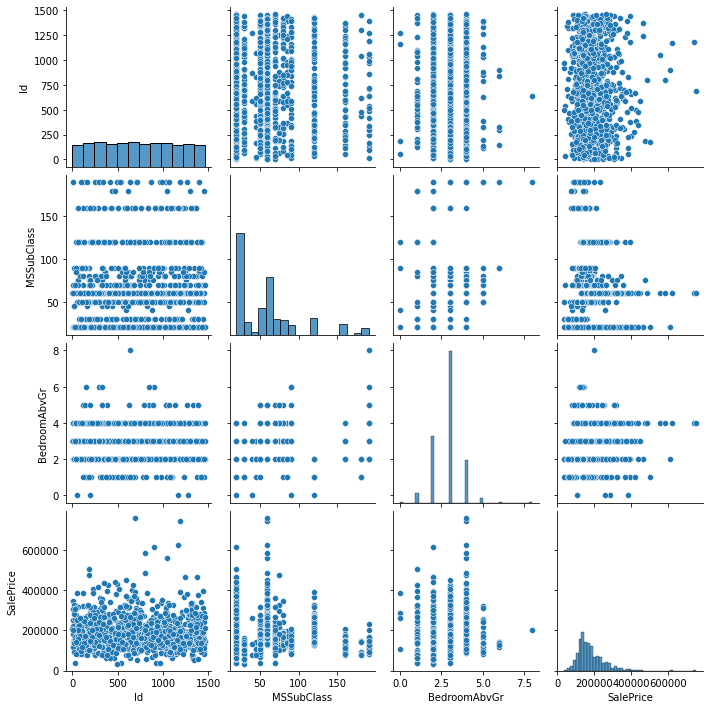

In [71]:
sns.pairplot(df[['Id','MSSubClass','BedroomAbvGr','SalePrice']])

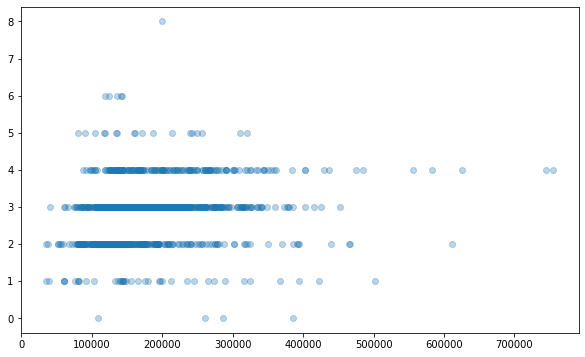

In [72]:
plt.figure(figsize=(10,6))
plt.scatter(y=df['BedroomAbvGr'],x=df['SalePrice'],alpha=0.3)

In [73]:
df.drop_duplicates(inplace = True)

In [74]:
df.shape

(1168, 50)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 0 to 1167
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1168 non-null   int64 
 1   MSSubClass     1168 non-null   int64 
 2   MSZoning       1168 non-null   object
 3   Street         1168 non-null   object
 4   LotShape       1168 non-null   object
 5   LandContour    1168 non-null   object
 6   Utilities      1168 non-null   object
 7   LotConfig      1168 non-null   object
 8   LandSlope      1168 non-null   object
 9   Neighborhood   1168 non-null   object
 10  Condition1     1168 non-null   object
 11  Condition2     1168 non-null   object
 12  BldgType       1168 non-null   object
 13  HouseStyle     1168 non-null   object
 14  OverallQual    1168 non-null   int64 
 15  OverallCond    1168 non-null   int64 
 16  YearBuilt      1168 non-null   int64 
 17  YearRemodAdd   1168 non-null   int64 
 18  RoofStyle      1168 non-null

In [76]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(df[["BsmtFullBath","FullBath","HalfBath","BedroomAbvGr","GarageCars","GarageArea"]],df.SalePrice,test_size=0.3,random_state=42)

In [77]:
len(x_train)

817

In [78]:
len(x_test)

351

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [81]:
linreg.intercept_

-4881.4902574024745

In [82]:
linreg.coef_

array([26679.73785731, 50021.26293769, 25019.54707213,  2060.9627429 ,
       22245.49334955,    86.10549404])

In [83]:
list(zip(["BsmtFullBath","FullBath","HalfBath","BedroomAbvGr","GarageCars","GarageArea"], list(linreg.coef_)))

[('BsmtFullBath', 26679.737857310847),
 ('FullBath', 50021.262937693864),
 ('HalfBath', 25019.54707213473),
 ('BedroomAbvGr', 2060.962742900453),
 ('GarageCars', 22245.493349545206),
 ('GarageArea', 86.10549404029007)]

In [84]:
y_pred=linreg.predict(x_test)

In [85]:
test_pred_df= pd.DataFrame({'actual':y_test,
                           'predicted':np.round(y_pred, 2),
                           'residuals':y_test - y_pred})

test_pred_df.sample(10)

,actual,predicted,residuals
1119,91500,126418.39,-34918.393190
382,193879,200775.78,-6896.784858
331,234000,179938.26,54061.744700
591,235000,166934.96,68065.041382
513,207500,222197.52,-14697.518464
1155,104900,136062.21,-31162.208523
824,180500,188887.66,-8387.657566
43,130000,178555.00,-48554.998281
227,103200,47200.74,55999.264577
533,239000,296235.80,-57235.798418


In [86]:
from sklearn import metrics

In [87]:
r2=metrics.r2_score(y_train,linreg.predict(x_train))
print("R squared:", r2)

R squared: 0.5619816094110293


In [88]:
mse= metrics.mean_squared_error(y_test,y_pred)

In [89]:
rmse=round(np.sqrt(mse),2)
print("RMSE:",rmse)

RMSE: 54245.3


In [90]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB().fit(x_train,y_train)

In [91]:
print(classifier.predict(x_train))
print(y_train.values)

[140000 135000 160000 141000 140000 176000 140000 140000 160000 160000
 140000 140000 140000 160000 135000 140000 140000 140000 140000 140000
 104000 160000 110000 140000 140000 141000 160000 140000 140000 140000
 185000 141000 160000 160000 135000 140000 140000 135000 140000 140000
 140000 104000 135000 135000 140000 127000 160000 140000 160000 160000
 127000 110000 140000 140000 135000 160000 185000 135900 110000 160000
 140000 140000 160000 140000 140000 135000 185000 160000 140000 140000
 160000 160000 135000 190000 140000 160000 140000 120500 160000 140000
 160000 185000 185000 127000 140000 135900 140000 140000 110000 140000
 160000 110000 140000 140000 160000 160000 160000 160000 140000 140000
 110000 160000 110000 104000 135000 140000 160000 135000 140000 140000
 110000 135000 140000 110000 135000 120500 140000 140000 160000 160000
 140000 160000 140000 140000 104000 140000 160000 160000 140000 160000
 140000 160000 140000 185000 146000 185000 140000 185000 160000 140000
 10400

In [92]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
pred=classifier.predict(x_train)
print(classification_report(y_train,pred))
print()
print('confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ',accuracy_score(y_train,pred))

              precision    recall  f1-score   support

       35311       0.00      0.00      0.00         1
       37900       0.00      0.00      0.00         1
       39300       0.00      0.00      0.00         1
       40000       0.00      0.00      0.00         1
       52000       0.00      0.00      0.00         1
       55000       0.00      0.00      0.00         1
       58500       0.00      0.00      0.00         1
       60000       0.00      0.00      0.00         3
       61000       0.00      0.00      0.00         1
       62383       0.00      0.00      0.00         1
       66500       0.00      0.00      0.00         1
       72500       0.00      0.00      0.00         1
       75000       0.00      0.00      0.00         1
       75500       0.00      0.00      0.00         1
       76000       0.00      0.00      0.00         1
       76500       0.00      0.00      0.00         1
       79000       0.00      0.00      0.00         1
       80000       0.00    

c:\users\chitrak\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\chitrak\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\chitrak\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera